# Gaussian Process Classifier
### Nathan Kirse

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("No_Errors_Reduced.csv").drop('Unnamed: 0', axis=1)
pd.set_option('display.max_columns', None)
print(df.shape)
print(df['Exoplanet Archive Disposition'].value_counts())
df.head()

(5217, 24)
FALSE POSITIVE    3115
CONFIRMED         2102
Name: Exoplanet Archive Disposition, dtype: int64


,PRF Δθ<sub>SQ</sub>(KIC) [arcsec],Number of Planets,Planet-Star Radius Ratio,Planetary Radius [Earth radii],PRF Δθ<sub>SQ</sub>(OOT) [arcsec],Maximum Multiple Event Statistic,FW Offset Significance [percent],Planet-Star Distance over Star Radius,Transit Depth [ppm],Transit Signal-to-Noise,Inclination [deg],Equilibrium Temperature [K],Impact Parameter,Number of Transits,Stellar Metallicity [dex],FW Source Δα(OOT) [sec],Transit Duration [hrs],FW Source Δδ(OOT) [arcsec],Maximum Single Event Statistic,Fitted Stellar Density [g/cm**3],Orbit Semi-Major Axis [AU],Orbital Period [days],Insolation Flux [Earth flux],Exoplanet Archive Disposition
0,0.320,2,0.022344,2.26,0.200,28.470820,0.002,24.810,615.8,35.8,89.66,793.0,0.146,142.0,0.14,0.430,2.95750,0.940,5.135849,3.20796,0.0853,9.488036,93.59,CONFIRMED
1,0.500,2,0.027954,2.83,0.390,20.109507,0.003,77.900,874.8,25.8,89.57,443.0,0.586,25.0,0.14,-0.630,4.50700,1.230,7.027669,3.02368,0.2734,54.418383,9.11,CONFIRMED
2,0.276,1,0.387394,33.46,0.289,541.895100,0.000,3.278,8079.2,505.6,67.09,1395.0,1.276,621.0,-0.52,-0.111,2.40641,0.002,39.066550,0.22080,0.0267,1.736952,891.96,FALSE POSITIVE
3,0.070,1,0.024064,2.75,0.100,33.191900,0.733,8.750,603.3,40.9,85.41,1406.0,0.701,515.0,0.07,-0.010,1.65450,0.230,4.749945,1.98635,0.0374,2.525592,926.16,CONFIRMED
4,8.948,1,0.183387,39.21,8.930,46.153080,0.000,2.400,233.7,47.7,60.92,1342.0,1.169,185.0,0.00,-13.450,5.02200,24.090,10.964684,0.00485,0.0820,7.361790,767.22,FALSE POSITIVE


# Scale and Split Data

In [4]:
cols = list(df.columns)

In [5]:
X = pd.DataFrame(scale(df.drop('Exoplanet Archive Disposition',axis=1)), columns=cols[:-1])
y = df['Exoplanet Archive Disposition']
X.head()

C:\Users\npk1503\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,PRF Δθ<sub>SQ</sub>(KIC) [arcsec],Number of Planets,Planet-Star Radius Ratio,Planetary Radius [Earth radii],PRF Δθ<sub>SQ</sub>(OOT) [arcsec],Maximum Multiple Event Statistic,FW Offset Significance [percent],Planet-Star Distance over Star Radius,Transit Depth [ppm],Transit Signal-to-Noise,Inclination [deg],Equilibrium Temperature [K],Impact Parameter,Number of Transits,Stellar Metallicity [dex],FW Source Δα(OOT) [sec],Transit Duration [hrs],FW Source Δδ(OOT) [arcsec],Maximum Single Event Statistic,Fitted Stellar Density [g/cm**3],Orbit Semi-Major Axis [AU],Orbital Period [days],Insolation Flux [Earth flux]
0,-0.512749,0.574665,-0.082209,-0.029689,-0.552872,-0.251865,-0.504768,-0.135335,-0.308900,-0.313184,0.520745,-0.450817,-0.217554,-0.479365,0.929629,0.048426,-0.380230,0.078659,-0.224601,-0.008000,-0.300312,-0.310893,-0.091127
1,-0.456060,0.574665,-0.080036,-0.029535,-0.493124,-0.254227,-0.500411,0.502853,-0.305029,-0.325034,0.515233,-0.897733,-0.049885,-0.686469,0.929629,-0.019383,-0.157404,0.095238,-0.222009,-0.015344,0.478554,0.197945,-0.093133
2,-0.526606,-0.482468,0.059159,-0.021243,-0.524885,-0.106805,-0.513481,-0.394169,-0.197334,0.243540,-0.861401,0.317877,0.213050,0.368523,-1.370972,0.013818,-0.459479,0.025032,-0.178113,-0.127042,-0.542957,-0.398674,-0.072172
3,-0.591483,-0.482468,-0.081543,-0.029556,-0.584318,-0.250531,2.679901,-0.328391,-0.309087,-0.307140,0.260482,0.331923,-0.006062,0.180890,0.685626,0.020279,-0.567608,0.038067,-0.225129,-0.056683,-0.498652,-0.389743,-0.071360
4,2.204522,-0.482468,-0.019844,-0.019687,2.192392,-0.246869,-0.513481,-0.404723,-0.314612,-0.299082,-1.239240,0.250202,0.172276,-0.403250,0.441623,-0.839492,-0.083345,1.402179,-0.216615,-0.135648,-0.313976,-0.334973,-0.075134


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Baseline Test

In [18]:
import time

gpc = GaussianProcessClassifier(random_state=42)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

start=time.time()
scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
#Not sure if std is multiplied by two or not.
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

121.31755447387695
Validation Accuracy: 93.75 (+/- 1.28)
Train Accuracy: 95.64 (+/- 0.46)


In [8]:
import time

gpc = GaussianProcessClassifier(random_state=42)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

start=time.time()
scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
#Not sure if std is multiplied by two or not.
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

333.8432266712189
Validation Accuracy: 96.87 (+/- 0.94)
Train Accuracy: 98.49 (+/- 0.20)


# With RBF Kernel

In [23]:
import time

gpc = GaussianProcessClassifier(kernel=RBF(), n_restarts_optimizer=1, random_state=42)
ss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=3)

start=time.time()
scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
#Not sure if std is multiplied by two or not.
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

145.7860803604126
Validation Accuracy: 93.29 (+/- 0.96)
Train Accuracy: 93.73 (+/- 0.40)


# Trial 1 - n_restarts_optimizer

675.0315022468567


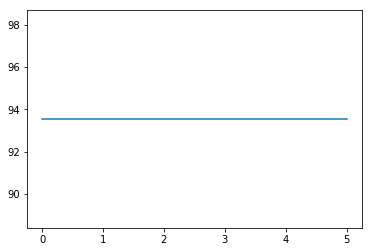

In [24]:
#Default is 0
import time

start = time.time()
splits = []
ss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=3)
for i in range(0,6):
    gpc = GaussianProcessClassifier(kernel=RBF(), n_restarts_optimizer=i, random_state=42)
    scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
end=time.time()
print(end-start)

plt.plot(splits)
plt.show()
#No change at all

# Trial 2 - max_iter_predict

54.528366565704346


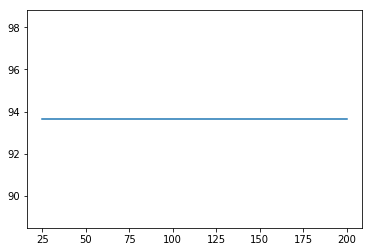

In [30]:
#Default is 100
import time

start = time.time()
splits = []
for i in range(25,201,25):
    ss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=3)
    gpc = GaussianProcessClassifier(max_iter_predict=i, random_state=42)
    scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
end=time.time()
print(end-start)

plt.plot(range(25,201,25), splits)
plt.show()
#No change at all

# Trial 3 - RBF Kernel

In [31]:
#Default is 1
import time

start = time.time()
splits = []
for i in [0.001,0.01,0.1,1,2,5,10]:
    ss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=3)
    gpc = GaussianProcessClassifier(kernel=RBF(i), random_state=42)
    scores=cross_validate(gpc, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
end=time.time()
print(end-start)

scores
#No change at all

285.44990515708923


{'fit_time': array([46.15558028, 45.86131167, 45.95109892, 45.98002124, 45.74963999]),
 'score_time': array([0.06083202, 0.07280588, 0.06283188, 0.06582427, 0.07380128]),
 'test_score': array([0.92974453, 0.93978102, 0.9379562 , 0.93613139, 0.93339416]),
 'train_score': array([0.94050881, 0.93659491, 0.93542074, 0.9369863 , 0.9369863 ])}

In [32]:
splits

[40.32846715328467,
 40.98540145985402,
 93.54014598540147,
 93.54014598540147,
 93.54014598540147,
 93.54014598540147,
 93.54014598540147]

# Conclusion: Baseline test resulted in the best possible score